## Preprocesamiento de datos Sydney

#### Importamos las librerías a usar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

#### Leemos los CSV

In [2]:
listings = pd.read_csv("Recursos/listings.csv", index_col= "id") # CSV con información escueta sobre los alojamientos en Sidney
listings_details = pd.read_csv("Recursos/listings_details.csv", index_col= "id", low_memory=False) # CSV con información detallada sobre los alojamientos en Sidney

calendar = pd.read_csv("Recursos/calendar.csv", parse_dates=['date'], index_col=['listing_id'], low_memory=False) # CSV con información sobre la disponibilidad de los alojamientos en Sidney
reviews_details = pd.read_csv("Recursos/reviews_details.csv", parse_dates=['date']) # CSV con información sobre las reseñas de los alojamientos en Sidney

##### Observamos las variables en nuestros distintos conjuntos de datos

In [3]:
listings.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [4]:
listings_details.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar

##### Elegimos qué variables vamos a usar, ya que listings_details tiene muchísimas variables que no nos interesan en este análisis

In [5]:
# Columnas que vamos a añadir a nuestro conjunto de datos
target_columns = ["property_type", "accommodates", "amenities", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "bedrooms", "beds"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left') # Fusionamos las columnas con el conjunto de datos original
listings.info() # Mostramos la información del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
Index: 14274 entries, 1050164598350388320 to 39340372
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            14274 non-null  object 
 1   host_id                         14274 non-null  int64  
 2   host_name                       14274 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   14274 non-null  object 
 5   latitude                        14274 non-null  float64
 6   longitude                       14274 non-null  float64
 7   room_type                       14274 non-null  object 
 8   price                           14272 non-null  float64
 9   minimum_nights                  14274 non-null  int64  
 10  number_of_reviews               14274 non-null  int64  
 11  last_review                     11908 non-null  object 
 12  reviews_per_mont

In [6]:
pd.set_option("display.max_columns", None)
listings.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,property_type,accommodates,amenities,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1050164598350388320,Self service English breakfast,211218678,Paul,NaN,Botany Bay,-33.924060,151.197320,Private room,100.0,1,0,NaN,NaN,1,268,0,PID-STRA-61891,Private room in bed and breakfast,2,"[""Wifi"", ""Washer"", ""TV"", ""Lock on bedroom door...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,https://www.airbnb.com/rooms/1050164598350388320,f,NaN,a few days or more,20%,1.0,1.0
1096082243192434668,Apartment in Rushcutters Bay,26721338,Anne,NaN,Sydney,-33.874830,151.225800,Entire home/apt,250.0,1,0,NaN,NaN,2,228,0,Exempt,Entire rental unit,4,"[""Carbon monoxide alarm"", ""Smoke alarm"", ""Wifi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365,https://www.airbnb.com/rooms/1096082243192434668,f,"J'aime voyager, lire, le sport (taekwondo, rando)",within an hour,100%,2.0,2.0
2167538,"Modern Sydney home near beach,shops",11059668,Sophie,NaN,Waverley,-33.895820,151.245490,Entire home/apt,650.0,90,1,2015-04-01,0.01,1,365,0,NaN,Entire home,5,"[""Air conditioning"", ""Dryer"", ""Wifi"", ""Washer""...",2015-04-01,4.00,4.00,5.00,4.00,5.00,5.00,4.00,1125,https://www.airbnb.com/rooms/2167538,f,"Hi, I am Sophie. We love our house and share m...",within a day,100%,3.0,3.0
790607305500629830,Luxury double room,202112801,Vivian,NaN,Canada Bay,-33.851626,151.086324,Private room,84.0,1,31,2024-03-07,2.13,30,365,26,PID-STRA-21723,Private room in home,1,"[""Fire extinguisher"", ""Cooking basics"", ""Essen...",2023-01-07,4.68,4.52,4.68,4.65,4.77,4.81,4.71,365,https://www.airbnb.com/rooms/790607305500629830,f,NaN,within an hour,99%,1.0,1.0
641106357139201992,Chic Studio Apartment in Prime Bondi Location,279001183,MadeComfy,NaN,Waverley,-33.890550,151.275230,Entire home/apt,508.0,1,17,2023-02-19,0.84,217,0,0,PID-STRA-36651,Entire rental unit,2,"[""Air conditioning"", ""First aid kit"", ""Wifi"", ...",2022-07-22,4.29,4.18,4.94,4.41,3.94,3.71,4.00,365,https://www.airbnb.com/rooms/641106357139201992,f,"Hi, and welcome to MadeComfy!\n\nWe are a team...",NaN,NaN,1.0,1.0


#### Mostramos los valores nulos en cada columna

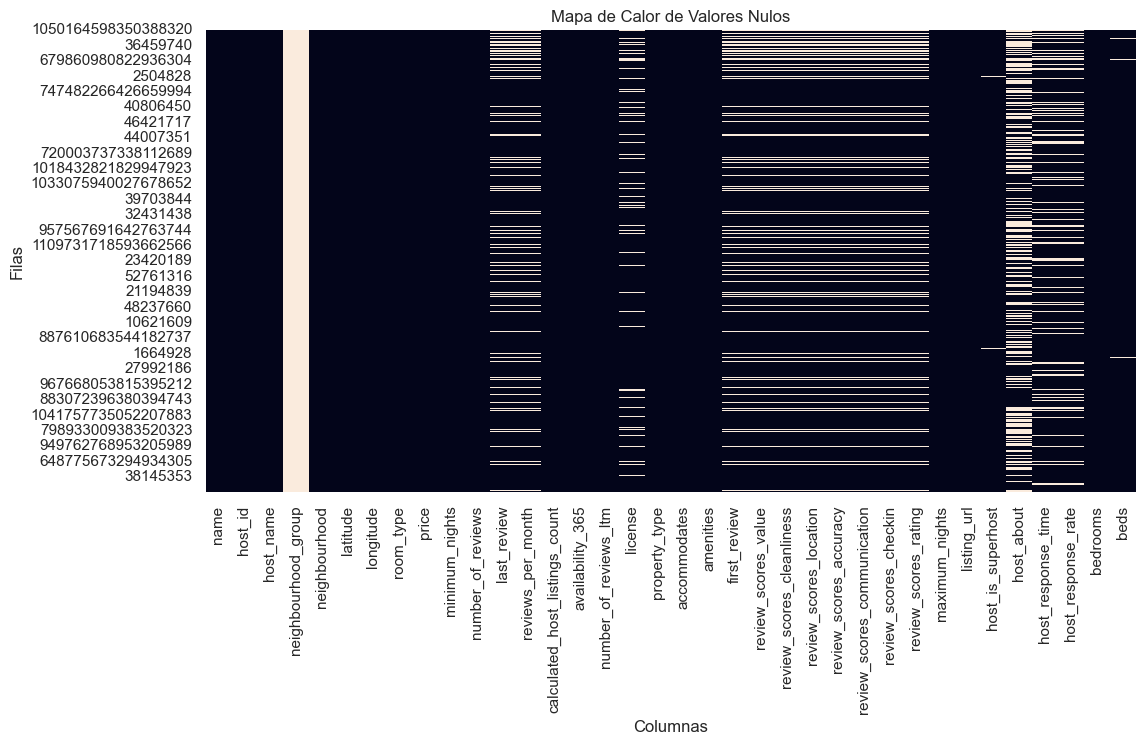

In [7]:
# Configuramos el tamaño de la figura para mostrar todas nuestras variables
plt.figure(figsize=(12, 6))

# Creamos un mapa de calor para visualizar los valores nulos
sns.heatmap(listings.isna(), cbar=False)

# Agregamos título y etiquetas
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

plt.show()

##### Sustituimos los valores nulos de "first_review" y "last_review" para ser más descriptivos

In [8]:
for i in listings.columns:
    if i.endswith("review"): # Como solo tenemos dos columnas que terminen por "review", hacemos una comprobación simple.
        listings[i].fillna("No hay reviews disponibles", inplace=True) # Rellenamos los valores nulos

C:\Users\NITROPC\AppData\Local\Temp\ipykernel_17476\2392282815.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings[i].fillna("No hay reviews disponibles", inplace=True) # Rellenamos los valores nulos


##### Tiramos la columna "neighbourhood_group" ya que está vacía. Además, pasamos la columna "host_response_rate" a valores numéricos quitando el "%"

In [9]:
listings = listings.drop(columns=["neighbourhood_group"])
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

In [10]:
listings.isna().sum()

name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                2
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2366
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1474
property_type                        0
accommodates                         0
amenities                            0
first_review                         0
review_scores_value               2385
review_scores_cleanliness         2385
review_scores_location            2385
review_scores_accuracy            2385
review_scores_communication       2385
review_scores_checkin    

#### La columna "price" tiene tan sólo dos valores nulos, así que iteramos sobre ellos manualmente

In [11]:
# Valores específicos para reemplazar los nulos, sacado directamente del enlace al apartamento
specific_values = [48.32, 77.31]
null_indices = listings[listings['price'].isnull()].index # Sacamos los índices nulos
# Recorremos el dataframe y reemplazamos los valores nulos por los que hemos encontrado en la web.
if len(null_indices) == len(specific_values):
    listings.loc[null_indices, 'price'] = specific_values

In [12]:
listings["price"].isnull().sum() # Comprobamos que no hay valores nulos.

0

##### Convertimos a euros los dólares australianos, usando el factor de conversión dado por Google Finance.

In [13]:
listings['price_eur'] = listings['price'] * 0.62 # Factor de conversión sencillo para pasar de dólares australianos a euros.

In [14]:
column_to_move = listings.pop("price_eur") # Extraemos la columna que queremos mover.
listings.insert(listings.columns.get_loc("price") + 1, "price_eur", column_to_move) # Insertamos la columna en la posición deseada, en este caso, justo después de la columna "price".

#### Limpiamos los valores nulos en "bedroom" y "bed", agrupando los apartemos por tipo de propiedad, tipo de habitación y la media de su precio

##### Limpiamos "bedroom"

In [15]:
avg_price = listings.groupby(['property_type', 'room_type'])['price'].transform('mean') # Calculamos la media de los precios por tipo de propiedad y tipo de habitación.
# Agrupamos según el tipo de propiedad, tipo de habitación y la media de los precios para calcular la mediana de las habitaciones.
median_bedrooms = listings.groupby(['property_type', 'room_type', avg_price])['bedrooms'].transform('median') 
median_bedrooms

id
1050164598350388320    1.0
1096082243192434668    1.0
2167538                3.0
790607305500629830     1.0
641106357139201992     1.0
                      ... 
5895126                1.0
33277913               1.0
662738262359322420     1.0
1109685047686852743    1.0
39340372               1.0
Name: bedrooms, Length: 14274, dtype: float64

In [16]:
listings['bedrooms'].fillna(median_bedrooms, inplace=True) # Sustituimos los valores nulos por la mediana calculada previamente.

C:\Users\NITROPC\AppData\Local\Temp\ipykernel_17476\915291673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings['bedrooms'].fillna(median_bedrooms, inplace=True) # Sustituimos los valores nulos por la mediana calculada previamente.


In [17]:
listings.isnull().sum() # Comprobamos que no hay valores nulos.

name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
price_eur                            0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2366
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1474
property_type                        0
accommodates                         0
amenities                            0
first_review                         0
review_scores_value               2385
review_scores_cleanliness         2385
review_scores_location            2385
review_scores_accuracy            2385
review_scores_communicati

##### Limpiamos "bed", esta vez agrupando también por las habitaciones

In [18]:
# Repetimos lo anterior pero esta vez agrupando también por el número de habitaciones.
median_beds = listings.groupby(['property_type', 'room_type', avg_price, "bedrooms"])['beds'].transform('median')
median_beds

id
1050164598350388320    1.0
1096082243192434668    2.0
2167538                3.0
790607305500629830     1.0
641106357139201992     1.0
                      ... 
5895126                1.0
33277913               1.0
662738262359322420     1.0
1109685047686852743    1.0
39340372               1.0
Name: beds, Length: 14274, dtype: float64

In [19]:
listings['beds'].fillna(median_bedrooms, inplace=True) # Rellenamos los valores nulos con la mediana que hemos calculado.
listings.isnull().sum() # Comprobamos que no hay valores nulos.

C:\Users\NITROPC\AppData\Local\Temp\ipykernel_17476\744006079.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listings['beds'].fillna(median_bedrooms, inplace=True) # Rellenamos los valores nulos con la mediana que hemos calculado.


name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
price_eur                            0
minimum_nights                       0
number_of_reviews                    0
last_review                          0
reviews_per_month                 2366
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           1474
property_type                        0
accommodates                         0
amenities                            0
first_review                         0
review_scores_value               2385
review_scores_cleanliness         2385
review_scores_location            2385
review_scores_accuracy            2385
review_scores_communicati